In [1]:
import yfinance as yf
import json
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import dates as mdates

%matplotlib inline

plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (30, 10)

In [2]:
stock_dir_path = str(Path(os.path.abspath('')).parents[0] / 'data/stock_data/')
tickers_path = str(Path(os.path.abspath('')).parents[0] / 'data/stocksTickers.json')


In [3]:
tickers_path = str(Path(os.path.abspath('')).parents[0] / 'data/stocksTickers.json')
with open(tickers_path) as ticker_names: 
    names = json.load(ticker_names)

In [4]:
def download_yfinance_data(names_dict, peroid='10y', dir_path=stock_dir_path): 

    for ticker_name, name in names_dict.items(): 
        ticker = yf.Ticker(ticker_name)
        data = ticker.history(period=peroid)
        data.to_csv(str(Path(dir_path) / f'{name.lower()}.csv'))

In [33]:
# download_yfinance_data(names_dict=names)

In [5]:
def load_all_stocks_data(stock_path=stock_dir_path):
    data_dict = {}
    for filename in os.listdir(stock_dir_path): 
        data_dict[filename.split('.')[0]] = pd.read_csv(str(Path(stock_path) / filename))
        
    return data_dict

In [6]:
data_dict = load_all_stocks_data()

In [8]:
def plot_all_prices(data_dict, x_col, y_col, one_figsize:list, minticks=20, maxticks=30): 
    
    number_of_plots = len(data_dict)
    _, axes = plt.subplots(number_of_plots, 1, figsize=(one_figsize[0], one_figsize[1] * number_of_plots))

    for ax, (company, data) in zip(axes, data_dict.items()):
        ax.plot(data[x_col], data[y_col])
        ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks))
        ax.set_title(f'{company.capitalize()} close stock price in past 10 years.', size=25)
        ax.set_xlabel('Time', size=15)
        ax.set_ylabel('Price in $', size=15)
    
    plt.show()

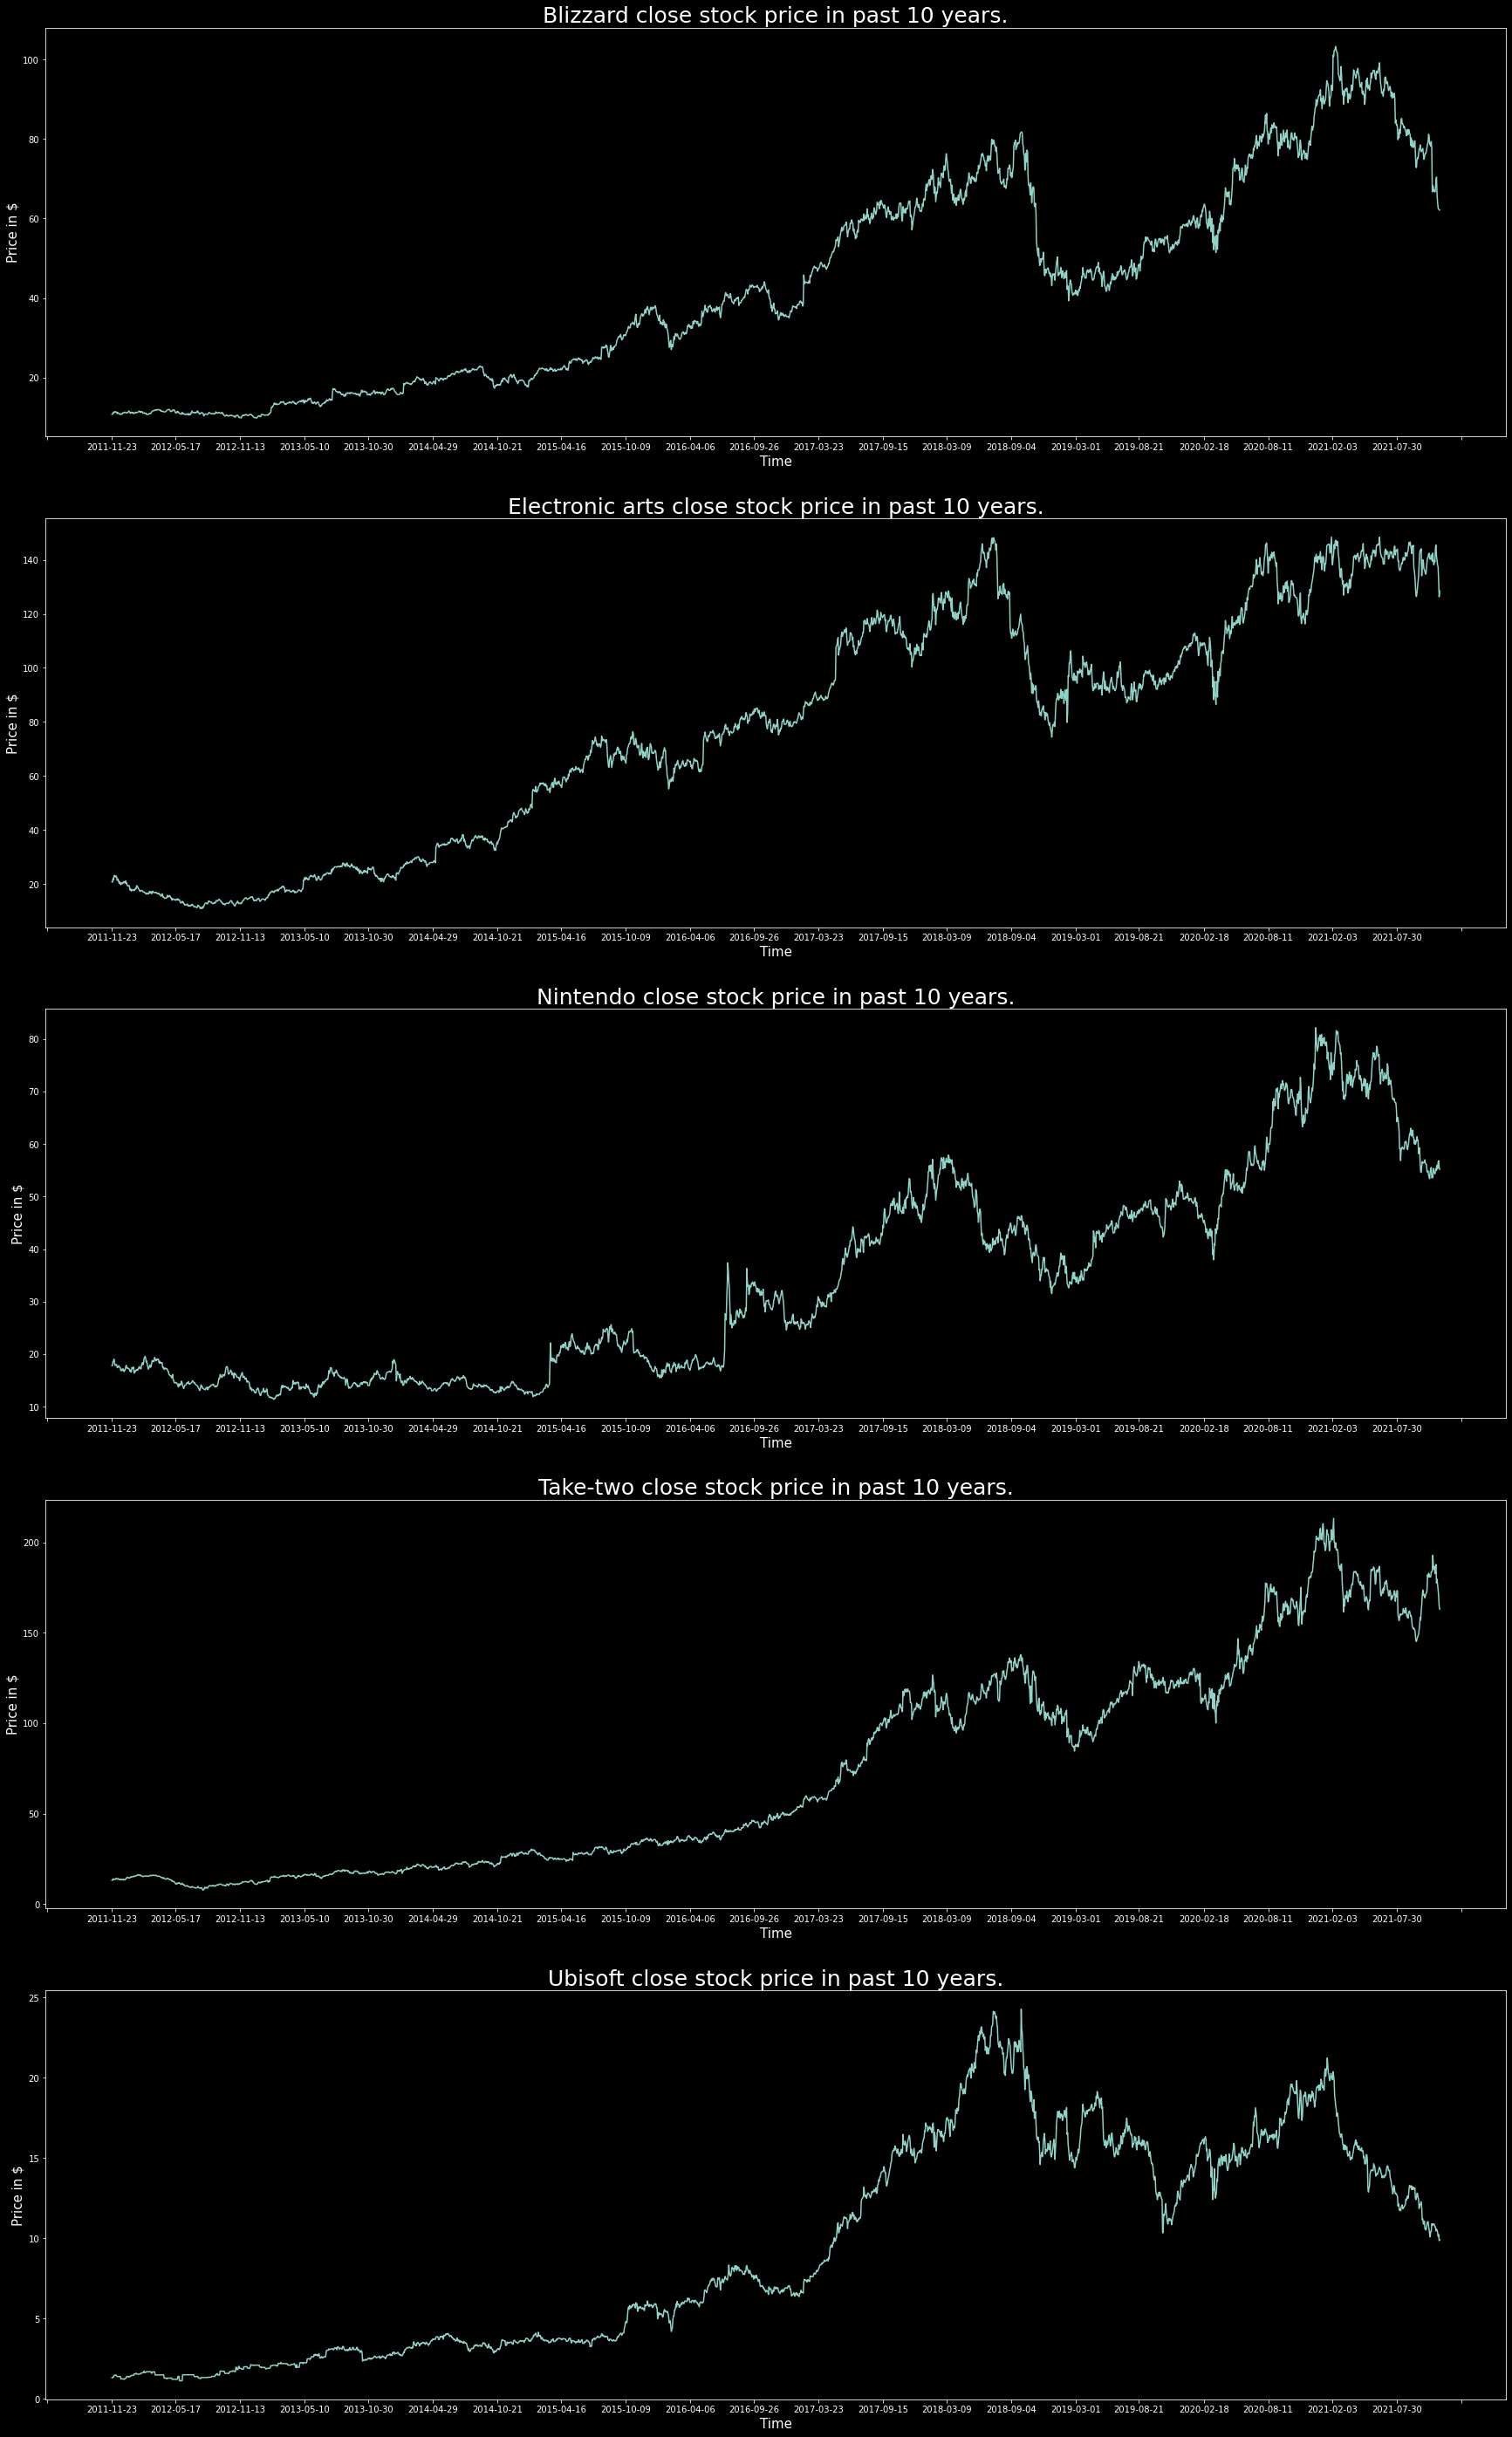

In [9]:
plot_all_prices(data_dict, 'Date', 'Close', [30, 10])

# Preparation of Technical Indicators 

## 1. Simple moving averages 

In [ ]:
for df in data_dict.values():
    df['SMA-7'] = df['Close'].roll

In [8]:
blizzard = data_dict['blizzard']

In [9]:
blizzard['Close'].roll

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2011-11-23,10.856486,11.012497,10.783070,10.783070,12543100,0.0,0
1,2011-11-25,10.728007,11.040028,10.728007,10.783070,5187800,0.0,0
2,2011-11-28,11.040028,11.177685,10.939081,11.159330,14166600,0.0,0
3,2011-11-29,11.095091,11.232747,10.957434,11.095091,7555500,0.0,0
4,2011-11-30,11.287810,11.407112,11.214393,11.397935,11788100,0.0,0
...,...,...,...,...,...,...,...,...
2512,2021-11-17,65.529999,65.639999,63.500000,64.199997,28771200,0.0,0
2513,2021-11-18,63.599998,64.050003,60.900002,62.669998,24241700,0.0,0
2514,2021-11-19,63.750000,64.089996,62.169998,62.380001,14485100,0.0,0
2515,2021-11-22,60.930000,62.410000,59.779999,62.200001,16583200,0.0,0
